In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from research_nonal_al import run_nonal_al_all, extract_paths_from_2paths, run_preprocess, run_calculate_dissimilarity
from research_nonal import run_nonal_all
from src.GWOptimalTransfer import GWOptimalTransfer
from src.CalculateDissimilarity import CalculateDissimilarity

from sklearn.cluster import KMeans
non_al_folder_path = './qualia_rawdata/non_alcohol/'
al_folder_path = './qualia_rawdata/alcohol/'
qualia_color = {
    'empatic_pain': 'orange',
    'guilt': 'black',
    'fear': 'violet',
    'anger': 'red',
    'envy': 'purple',
    'sadness': 'blue',
    'surprise': 'gray',
    'joy': 'cyan',
    'amusement': 'brown',
    'romance': 'pink',
    'aesthetic_appreciation': 'yellow',
    'awe': 'green',
}

In [12]:
#init
emotions = list(qualia_color.keys())
colors = list(qualia_color.values())

first_paths, second_paths = extract_paths_from_2paths(
    first_folder_path=non_al_folder_path,
    second_folder_path=al_folder_path
)
# print(f'first_paths:{len(first_paths)}, second_paths: {len(second_paths)}')
subjects, all_preprocessed_dfs = run_preprocess(
    first_paths=first_paths,
    second_paths=second_paths
)
all_dissimilarity_matrices, all_original_embeddings = run_calculate_dissimilarity(
        all_preprocessed_dfs=all_preprocessed_dfs,
        emotions=emotions,
        plot_dim=2,
    )
print(f'all_dissimilarity_matrices:{all_dissimilarity_matrices.shape}')
print(f'all_original_embeddings: {all_original_embeddings.shape}')


all_dissimilarity_matrices:(2, 9, 12, 12)
all_original_embeddings: (2, 9, 12, 2)


In [13]:
cal_dissim = CalculateDissimilarity(emotions=emotions)
gwot = GWOptimalTransfer(emotions=emotions)
all_embeddings = dict()
all_distances = dict()
mean_matrices = list()
mean_embeddings = list()
plot_dim = 2
iter_num = 10


for matrices in all_dissimilarity_matrices:
    mean_matrix = sum(matrices) / len(matrices)
    mean_matrices.append(mean_matrix)
    mean_embedding = cal_dissim.original_embedding(
        dissimilarity_matrix=mean_matrix,
        plot_dim=plot_dim
    )
    mean_embeddings.append(mean_embedding)


optimal_P, optimal_Q, mapped_mean_embeddings = gwot.run_personal_gwot(
    X_dissimilarity_matrix=mean_matrices[0],
    Y_dissimilarity_matrix=mean_matrices[1],
    X_embedding=mean_embeddings[0],
    Y_embedding=mean_embeddings[1],
    iter_num=iter_num
)
np.array(mapped_mean_embeddings).shape

  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 10/10 [00:11<00:00,  1.18s/it]

best_gw_distance: 1.8020823092402725


(2, 12, 2)

In [15]:
optimal_P, optimal_Q, mapped_mean_embeddings = gwot.run_personal_gwot(
    X_dissimilarity_matrix=mean_matrices[0],
    Y_dissimilarity_matrix=mean_matrices[0],
    X_embedding=mean_embeddings[0],
    Y_embedding=mean_embeddings[0],
    iter_num=100
)

100%|██████████| 100/100 [01:12<00:00,  1.38it/s]

best_gw_distance: 0.9354905488770855


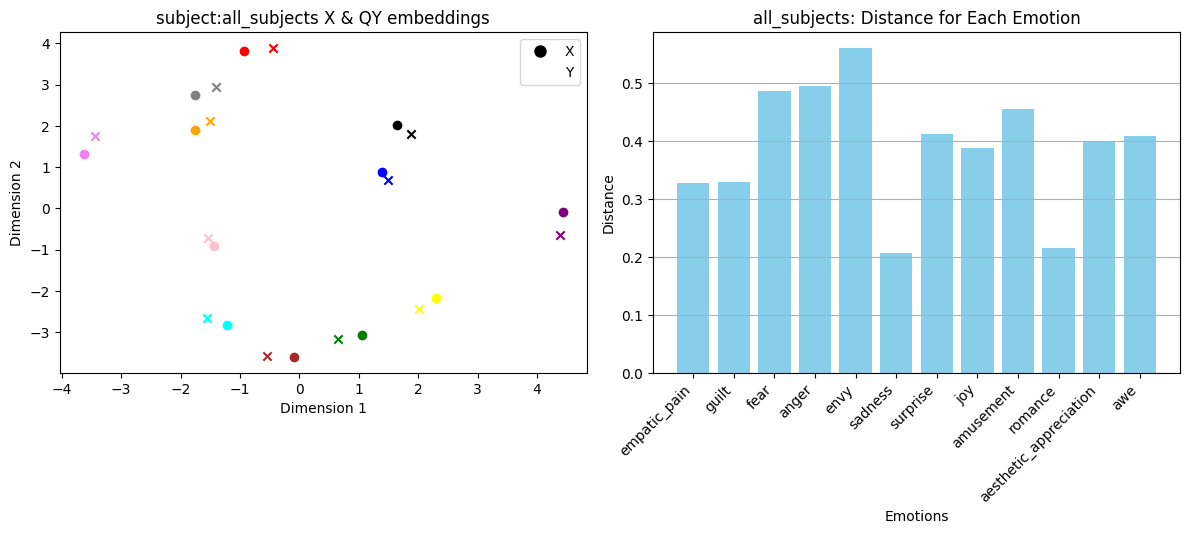

[0.32667529499032305,
 0.3284711268276782,
 0.48674497536410605,
 0.4941551380428299,
 0.5594302878432598,
 0.2074293947072721,
 0.41148754980961766,
 0.388452302430528,
 0.45493817374091994,
 0.2146331860337515,
 0.39854191223511565,
 0.40820433346561613]

In [16]:
gwot.plot_personal_embedding_and_distance(
    personal_embeddings=np.array(mapped_mean_embeddings),
    subject='all_subjects',
    colors=colors
)

## nonal vs al

In [186]:
iter_num = 200
plot_dim = 3

all_dissimilarity_matrices:(2, 9, 12, 12)
all_original_embeddings: (2, 9, 12, 3)
(2, 12, 3)


  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 200/200 [02:37<00:00,  1.27it/s]


best_gw_distance: 1.3066392650713858
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['empatic_pain', 'guilt', 'fear', 'anger', 'sadness', 'surprise']
Cluster 1: ['envy', 'amusement', 'awe']
Cluster 2: ['joy', 'romance', 'aesthetic_appreciation']


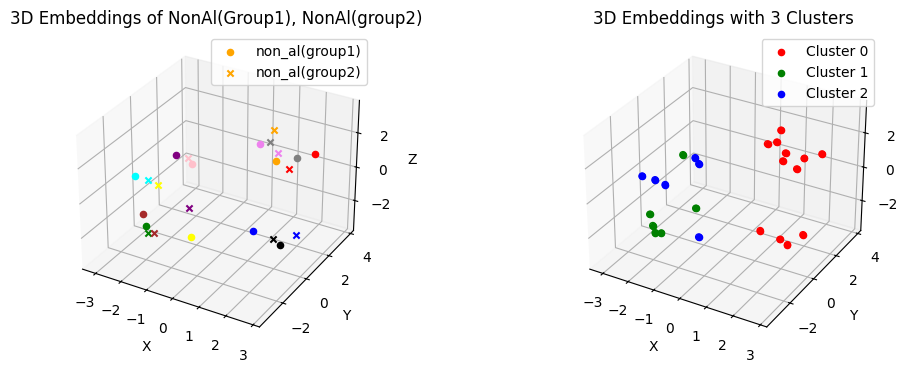

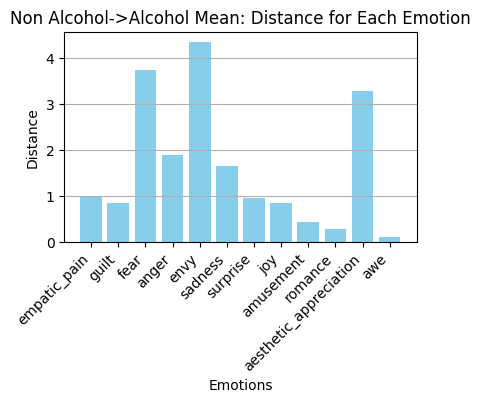

In [187]:
#init
emotions = list(qualia_color.keys())
colors = list(qualia_color.values())

first_paths, second_paths = extract_paths_from_2paths(
    first_folder_path=non_al_folder_path,
    second_folder_path=al_folder_path
)
# print(f'first_paths:{len(first_paths)}, second_paths: {len(second_paths)}')
subjects, all_preprocessed_dfs = run_preprocess(
    first_paths=first_paths,
    second_paths=second_paths
)
all_dissimilarity_matrices, all_original_embeddings = run_calculate_dissimilarity(
        all_preprocessed_dfs=all_preprocessed_dfs,
        emotions=emotions,
        plot_dim=plot_dim,
    )
print(f'all_dissimilarity_matrices:{all_dissimilarity_matrices.shape}')
print(f'all_original_embeddings: {all_original_embeddings.shape}')


cal_dissim = CalculateDissimilarity(emotions=emotions)
gwot = GWOptimalTransfer(emotions=emotions)
all_embeddings = dict()
all_distances = dict()
mean_matrices = list()
mean_embeddings = list()


for matrices in all_dissimilarity_matrices:
    mean_matrix = sum(matrices) / len(matrices)
    mean_matrices.append(mean_matrix)
    mean_embedding = cal_dissim.original_embedding(
        dissimilarity_matrix=mean_matrix,
        plot_dim=plot_dim
    )
    mean_embeddings.append(mean_embedding)

print(np.array(mean_embeddings).shape)

optimal_P, optimal_Q, mapped_mean_embeddings = gwot.run_personal_gwot(
    X_dissimilarity_matrix=mean_matrices[0],
    Y_dissimilarity_matrix=mean_matrices[1],
    X_embedding=mean_embeddings[0],
    Y_embedding=mean_embeddings[1],
    iter_num=iter_num
)
print(f'mapped mean embeddings:{np.array(mapped_mean_embeddings).shape}')

markers = ['o', 'x']
labels=['non_al(group1)', 'non_al(group2)']
n_clusters = 3
handles = []

fig = plt.figure(figsize=(12,9))

if plot_dim==2:
    ax = fig.add_subplot(2,2,1)
    for i in range(len(mapped_mean_embeddings)):
        for j in range(len(mapped_mean_embeddings[0])):
            scatter = ax.scatter(mapped_mean_embeddings[i][j,0], mapped_mean_embeddings[i][j,1], color=colors[j], marker=markers[i], label=labels[i])
            if j==0:
                handles.append(scatter)

elif plot_dim==3:
    ax = fig.add_subplot(2,2,1, projection='3d')
    for i in range(len(mapped_mean_embeddings)):
        for j in range(len(mapped_mean_embeddings[0])):
            scatter = ax.scatter(mapped_mean_embeddings[i][j,0], mapped_mean_embeddings[i][j,1], mapped_mean_embeddings[i][j,2], color=colors[j], marker=markers[i], label=labels[i])
            if j==0:
                handles.append(scatter)

ax.set_xlabel('X')
ax.set_ylabel('Y')
if plot_dim==3:
    ax.set_zlabel('Z')
ax.set_title(f'{plot_dim}D Embeddings of NonAl(Group1), NonAl(group2)')
ax.grid(True)

# 凡例を追加
ax.legend(handles, labels)

# 各感情ごとにデータを収集
emotion_embeddings = []
for i in range(12):
    emotion_embeddings.append(np.vstack([mapped_mean_embeddings[j][i] for j in range(len(mapped_mean_embeddings))]))

emotion_embeddings = np.array(emotion_embeddings)  # (12, 9, 2)の形状に変換

# 各感情ごとにデータをフラット化
flattened_embeddings = emotion_embeddings.reshape(12, -1)  # (12, 10)の形状に変換

# k-meansクラスタリングの適用
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_embeddings)

# クラスタのラベル取得
emotion_labels = kmeans.labels_

# クラスタごとの色設定
cluster_colors = ['r', 'g', 'b', 'y', 'c']
emotion_colors = [cluster_colors[label % len(cluster_colors)] for label in emotion_labels]
handles = dict()
#プロット
if plot_dim ==2:
    ax = fig.add_subplot(2,2,2)
    handle_cluster_flags = np.zeros(n_clusters)
    # 各感情のデータポイントをクラスタごとにプロット
    for i, embedding in enumerate(emotion_embeddings):
        for j in range(len(mapped_mean_embeddings)):
            scatter = ax.scatter(embedding[j, 0], embedding[j, 1],  color=emotion_colors[i], label=f'Cluster {emotion_labels[i]}' if j == 0 else "")
            if handle_cluster_flags[emotion_labels[i]] == 0:
                handles[f'Cluster {emotion_labels[i]}'] = scatter
                handle_cluster_flags[emotion_labels[i]] = 1
            ax.scatter(embedding[j, 0], embedding[j, 1], edgecolor=emotion_colors[i], facecolor='none')
elif plot_dim==3:
    ax = fig.add_subplot(2,2,2, projection='3d')
    handle_cluster_flags = np.zeros(n_clusters)
    # 各感情のデータポイントをクラスタごとにプロット
    for i, embedding in enumerate(emotion_embeddings):
        for j in range(len(mapped_mean_embeddings)):
            scatter = ax.scatter(embedding[j, 0], embedding[j, 1], embedding[j, 2],  color=emotion_colors[i])
            if handle_cluster_flags[emotion_labels[i]] == 0:
                handles[f'Cluster {emotion_labels[i]}'] = scatter
                handle_cluster_flags[emotion_labels[i]] = 1
            ax.scatter(embedding[j, 0], embedding[j, 1],  embedding[j, 2], edgecolor=emotion_colors[i], facecolor='none')


# グラフの装飾
ax.set_xlabel('X')
ax.set_ylabel('Y')
if plot_dim==3:
    ax.set_zlabel('Y')
ax.set_title(f'{plot_dim}D Embeddings with {n_clusters} Clusters')
ax.grid(True)
ax.legend(list(handles.values()), list(handles.keys()))


#感情が属しているクラス分類
cluster_emotions = {cluster: [] for cluster in range(n_clusters)}
for i, emotion in enumerate(emotions):
    cluster_emotions[emotion_labels[i]].append(emotion)
print("\nCluster Emotions:")
for cluster, emotions_ in cluster_emotions.items():
    print(f"Cluster {cluster}: {emotions_}")

np.array(mapped_mean_embeddings).shape
#感情間の距離の表示
embeddings_diff = mapped_mean_embeddings[0] - mapped_mean_embeddings[1]
distances = [(diff[0]**2 + diff[1]**2)**0.5 for diff in embeddings_diff]
# 棒グラフの作成
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(2,2,2)
ax.bar(emotions, distances, color='skyblue')
ax.set_xlabel('Emotions')
ax.set_ylabel('Distance')
ax.set_title(f'Non Alcohol->Alcohol Mean: Distance for Each Emotion')
ax.set_xticks(range(len(emotions)))  # ティックの位置を設定
ax.set_xticklabels(emotions, rotation=45, ha='right')
ax.grid(axis='y')
plt.show()
mean_distances_nonal_al = distances

## non_al vs non_Al

paths9
dissimilarity_matrices:(9, 12, 12)
original_embeddings: (9, 12, 3)
group1_matrices: (4, 12, 12)
mean_matrices: (2, 12, 12)
mean_embeddings: (2, 12, 3)


  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 200/200 [02:19<00:00,  1.44it/s]


best_gw_distance: 1.7343252280687524
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['empatic_pain', 'fear', 'anger', 'surprise']
Cluster 1: ['envy', 'joy', 'amusement', 'romance', 'aesthetic_appreciation', 'awe']
Cluster 2: ['guilt', 'sadness']


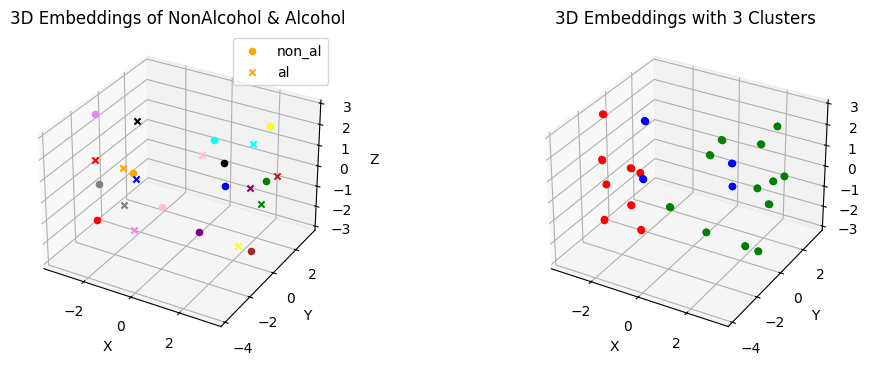

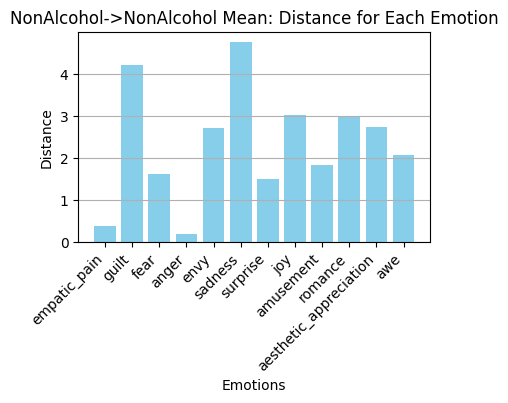

In [191]:
from research_nonal import extract_paths, run_preprocess, run_calculate_dissimilarity
#init
emotions = list(qualia_color.keys())

paths = extract_paths(folder_path=non_al_folder_path)
print(f'paths{len(paths)}')
subjects, preprocessed_dfs = run_preprocess(paths=paths)
dissimilarity_matrices, original_embeddings = run_calculate_dissimilarity(
    preprocessed_dfs=preprocessed_dfs,
    emotions=emotions,
    plot_dim=3
)
print(f'dissimilarity_matrices:{dissimilarity_matrices.shape}')
print(f'original_embeddings: {original_embeddings.shape}')

s = len(dissimilarity_matrices)//2
group1_matrices = dissimilarity_matrices[:s]
group2_matrices = dissimilarity_matrices[s:2*s]
print(f'group1_matrices: {group1_matrices.shape}')

mean_matrices = list()
mean_embeddings = list()
for matrices in [group1_matrices, group2_matrices]:
    mean_matrix = sum(matrices) / len(matrices)
    mean_matrices.append(mean_matrix)
    mean_embedding = cal_dissim.original_embedding(
        dissimilarity_matrix=mean_matrix,
        plot_dim=plot_dim
    )
    mean_embeddings.append(mean_embedding)
print(f'mean_matrices: {np.array(mean_matrices).shape}')
print(f'mean_embeddings: {np.array(mean_embeddings).shape}')

optimal_P, optimal_Q, mapped_mean_embeddings = gwot.run_personal_gwot(
    X_dissimilarity_matrix=mean_matrices[0],
    Y_dissimilarity_matrix=mean_matrices[1],
    X_embedding=mean_embeddings[0],
    Y_embedding=mean_embeddings[1],
    iter_num=iter_num
)
print(f'mapped mean embeddings:{np.array(mapped_mean_embeddings).shape}')

markers = ['o', 'x']
labels=['non_al', 'al']
n_clusters = 3
handles = []

fig = plt.figure(figsize=(12,9))
if plot_dim==2:
    ax = fig.add_subplot(2,2,1)
    for i in range(len(mapped_mean_embeddings)):
        for j in range(len(mapped_mean_embeddings[0])):
            scatter = ax.scatter(mapped_mean_embeddings[i][j,0], mapped_mean_embeddings[i][j,1], color=colors[j], marker=markers[i], label=labels[i])
            if j==0:
                handles.append(scatter)
elif plot_dim==3:
    ax = fig.add_subplot(2,2,1, projection='3d')
    for i in range(len(mapped_mean_embeddings)):
        for j in range(len(mapped_mean_embeddings[0])):
            scatter = ax.scatter(mapped_mean_embeddings[i][j,0], mapped_mean_embeddings[i][j,1], mapped_mean_embeddings[i][j,2], color=colors[j], marker=markers[i], label=labels[i])
            if j==0:
                handles.append(scatter)


ax.set_xlabel('X')
ax.set_ylabel('Y')
if plot_dim==3:
    ax.set_zlabel('Z')
ax.set_title(f'{plot_dim}D Embeddings of NonAlcohol & Alcohol')
ax.grid(True)


# 凡例を追加
ax.legend(handles, labels)

# 各感情ごとにデータを収集
emotion_embeddings = []
for i in range(12):
    emotion_embeddings.append(np.vstack([mapped_mean_embeddings[j][i] for j in range(len(mapped_mean_embeddings))]))

emotion_embeddings = np.array(emotion_embeddings)  # (12, 9, 2)の形状に変換

# 各感情ごとにデータをフラット化
flattened_embeddings = emotion_embeddings.reshape(12, -1)  # (12, 10)の形状に変換

# k-meansクラスタリングの適用
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_embeddings)

# クラスタのラベル取得
emotion_labels = kmeans.labels_

# クラスタごとの色設定
cluster_colors = ['r', 'g', 'b', 'y', 'c']
emotion_colors = [cluster_colors[label % len(cluster_colors)] for label in emotion_labels]
handles= dict()


#プロット
if plot_dim ==2:
    ax = fig.add_subplot(2,2,2)
    handle_cluster_flags = np.zeros(n_clusters)
    # 各感情のデータポイントをクラスタごとにプロット
    for i, embedding in enumerate(emotion_embeddings):
        for j in range(len(mapped_mean_embeddings)):
            scatter = ax.scatter(embedding[j, 0], embedding[j, 1],  color=emotion_colors[i], label=f'Cluster {emotion_labels[i]}' if j == 0 else "")
            if handle_cluster_flags[emotion_labels[i]] == 0:
                handles[f'Cluster {emotion_labels[i]}'] = scatter
                handle_cluster_flags[emotion_labels[i]] = 1
            ax.scatter(embedding[j, 0], embedding[j, 1], edgecolor=emotion_colors[i], facecolor='none')
elif plot_dim==3:
    ax = fig.add_subplot(2,2,2, projection='3d')
    handle_cluster_flags = np.zeros(n_clusters)
    # 各感情のデータポイントをクラスタごとにプロット
    for i, embedding in enumerate(emotion_embeddings):
        for j in range(len(mapped_mean_embeddings)):
            scatter = ax.scatter(embedding[j, 0], embedding[j, 1], embedding[j, 2],  color=emotion_colors[i], label=f'Cluster {emotion_labels[i]}' if j == 0 else "")
            if handle_cluster_flags[emotion_labels[i]] == 0:
                handles[f'Cluster {emotion_labels[i]}'] = scatter
                handle_cluster_flags[emotion_labels[i]] = 1
            ax.scatter(embedding[j, 0], embedding[j, 1],embedding[j, 2],  edgecolor=emotion_colors[i], facecolor='none')

# グラフの装飾
ax.set_xlabel('X')
ax.set_ylabel('Y')
if plot_dim==3:
    ax.set_zlabel('Y')
ax.set_title(f'{plot_dim}D Embeddings with {n_clusters} Clusters')
ax.grid(True)

#感情が属しているクラス分類
cluster_emotions = {cluster: [] for cluster in range(n_clusters)}
for i, emotion in enumerate(emotions):
    cluster_emotions[emotion_labels[i]].append(emotion)
print("\nCluster Emotions:")
for cluster, emotions_ in cluster_emotions.items():
    print(f"Cluster {cluster}: {emotions_}")

np.array(mapped_mean_embeddings).shape
#感情間の距離の表示
embeddings_diff = mapped_mean_embeddings[0] - mapped_mean_embeddings[1]
distances = [(diff[0]**2 + diff[1]**2)**0.5 for diff in embeddings_diff]
# 棒グラフの作成
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(2,2,2)
ax.bar(emotions, distances, color='skyblue')
ax.set_xlabel('Emotions')
ax.set_ylabel('Distance')
ax.set_title(f'NonAlcohol->NonAlcohol Mean: Distance for Each Emotion')
ax.set_xticks(range(len(emotions)))  # ティックの位置を設定
ax.set_xticklabels(emotions, rotation=45, ha='right')
ax.grid(axis='y')

plt.show()
mean_distances_nonal_nonal = distances

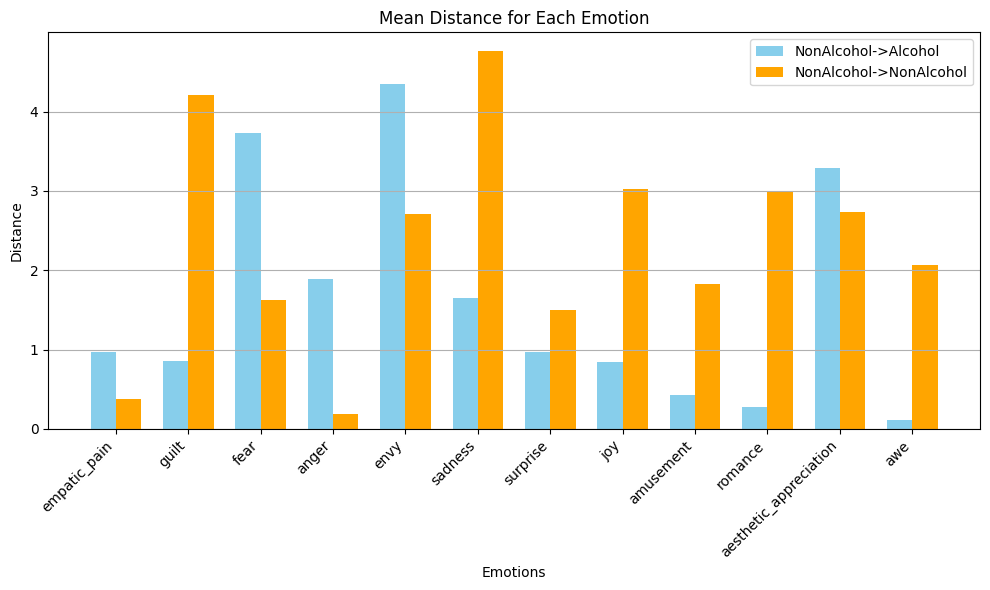

In [192]:
# バーの幅と位置の設定
bar_width = 0.35
index = np.arange(len(emotions))

# グラフの作成
fig, ax = plt.subplots(figsize=(10, 6))

# 棒グラフの描画
bar1 = ax.bar(index, mean_distances_nonal_al, bar_width, label='NonAlcohol->Alcohol', color='skyblue')
bar2 = ax.bar(index + bar_width, mean_distances_nonal_nonal, bar_width, label='NonAlcohol->NonAlcohol', color='orange')

# ラベルとタイトルの設定
ax.set_xlabel('Emotions')
ax.set_ylabel('Distance')
ax.set_title('Mean Distance for Each Emotion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(emotions, rotation=45, ha='right')
ax.legend()

# グリッドの追加
ax.grid(axis='y')

# グラフの表示
plt.tight_layout()
plt.show()

all_dissimilarity_matrices:(2, 9, 12, 12)
all_original_embeddings: (2, 9, 12, 3)
(2, 12, 3)


  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 1000/1000 [13:55<00:00,  1.20it/s]


best_gw_distance: 1.04508846309061
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['empatic_pain', 'guilt', 'fear', 'anger', 'sadness', 'surprise']
Cluster 1: ['envy', 'amusement', 'awe']
Cluster 2: ['joy', 'romance', 'aesthetic_appreciation']


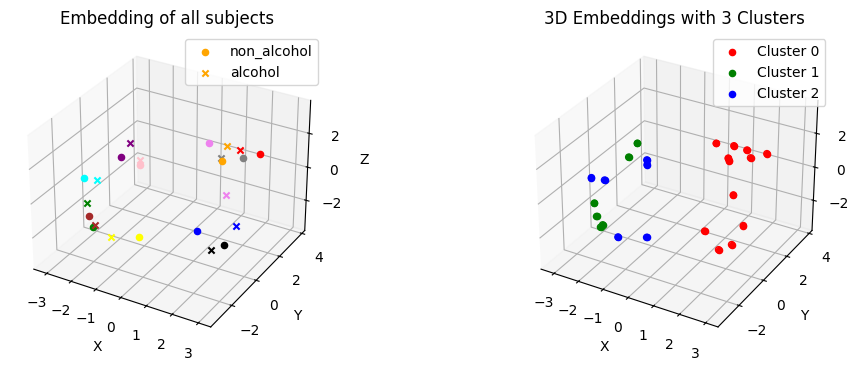

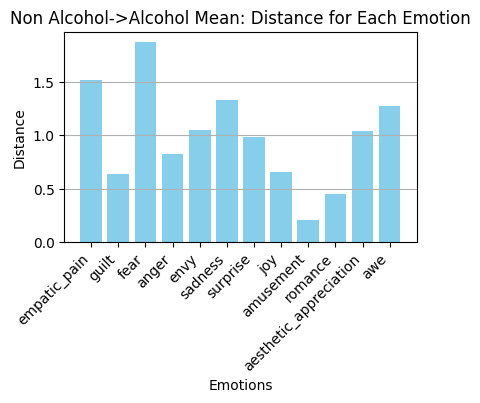

In [2]:
from src.EmotionAnalysis import EmotionAnalysis
ea = EmotionAnalysis(qualia_color=qualia_color)
non_al_folder_path = './qualia_rawdata/non_alcohol/'
al_folder_path = './qualia_rawdata/alcohol/'
all_distances = ea.process1(
    non_al_folder_path=non_al_folder_path,
    al_folder_path=al_folder_path,
    plot_dim=3,
    iter_num=1000,
    title='Embedding of all subjects',
    labels=['non_alcohol', 'alcohol']
)

## much_drunk, little_drunkの2群に分けて分析

all_dissimilarity_matrices:(2, 4, 12, 12)
all_original_embeddings: (2, 4, 12, 3)
(2, 12, 3)


  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 1000/1000 [20:07<00:00,  1.21s/it] 


best_gw_distance: 1.3043655629154791
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['empatic_pain', 'fear', 'anger', 'surprise']
Cluster 1: ['guilt', 'sadness', 'amusement', 'awe']
Cluster 2: ['envy', 'joy', 'romance', 'aesthetic_appreciation']


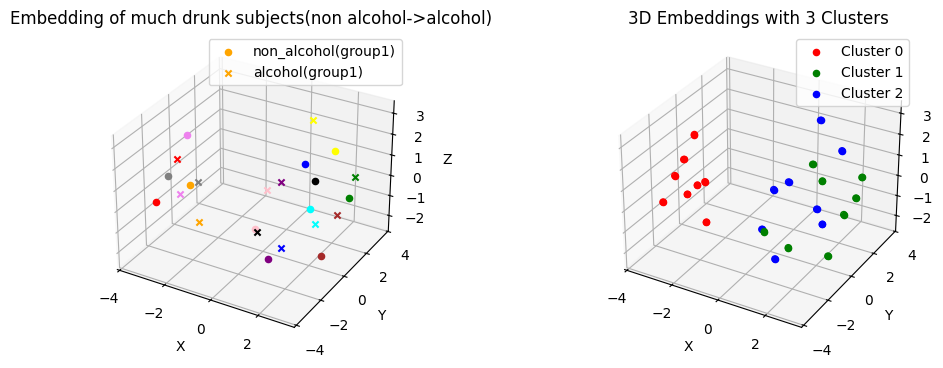

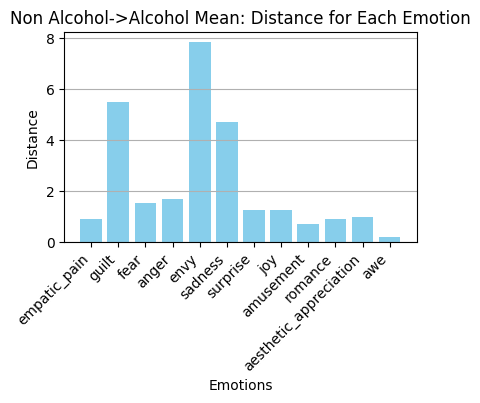

In [4]:
from src.EmotionAnalysis import EmotionAnalysis
ea = EmotionAnalysis(qualia_color=qualia_color)
non_al_folder_path = "./qualia_rawdata/cluster_by_alcohol/much_drunk/non_alcohol/"
al_folder_path = "./qualia_rawdata/cluster_by_alcohol/much_drunk/alcohol/"
much_drunk_distances = ea.process1(
    non_al_folder_path=non_al_folder_path,
    al_folder_path=al_folder_path,
    plot_dim=3,
    iter_num=1000,
    title='Embedding of much drunk subjects(non alcohol->alcohol)',
    labels=['non_alcohol(group1)', 'alcohol(group1)']
)

all_dissimilarity_matrices:(2, 4, 12, 12)
all_original_embeddings: (2, 4, 12, 3)
(2, 12, 3)


  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 1000/1000 [16:09<00:00,  1.03it/s]


best_gw_distance: 1.7971574541832989
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['empatic_pain', 'guilt', 'fear', 'anger', 'sadness', 'surprise', 'romance']
Cluster 1: ['joy', 'amusement', 'aesthetic_appreciation', 'awe']
Cluster 2: ['envy']


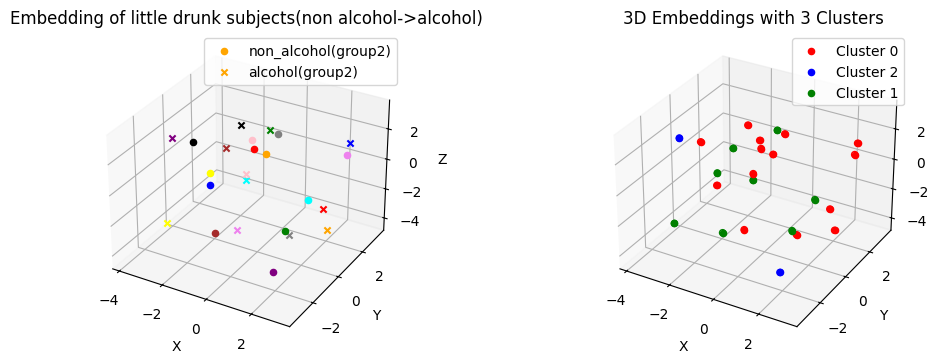

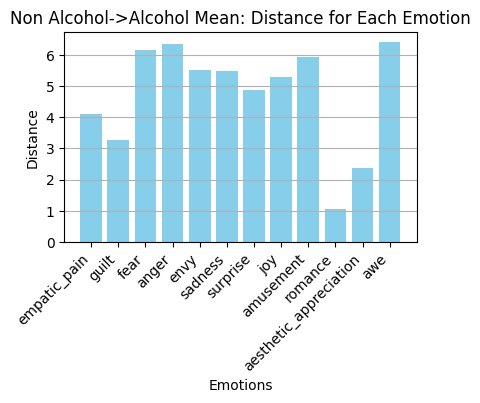

In [6]:
non_al_folder_path = "./qualia_rawdata/cluster_by_alcohol/little_drunk/non_alcohol/"
al_folder_path = "./qualia_rawdata/cluster_by_alcohol/little_drunk/alcohol/"
little_drunk_distances = ea.process1(
    non_al_folder_path=non_al_folder_path,
    al_folder_path=al_folder_path,
    plot_dim=3,
    iter_num=1000,
    title='Embedding of little drunk subjects(non alcohol->alcohol)',
    labels=['non_alcohol(group2)', 'alcohol(group2)']
)

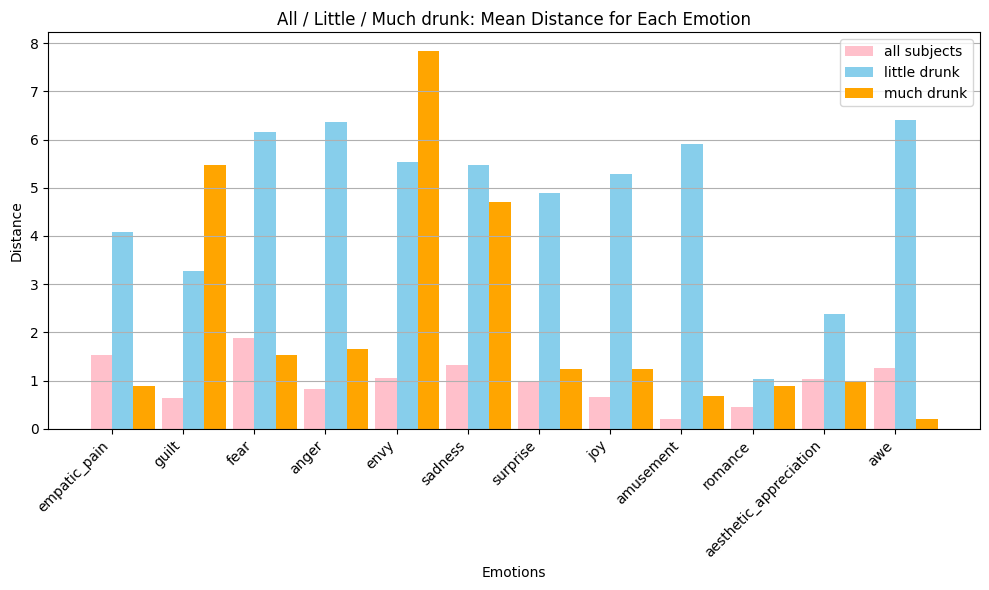

In [8]:
# バーの幅と位置の設定
emotions = list(qualia_color.keys())
bar_width = 0.3
index = np.arange(len(emotions))

# グラフの作成
fig, ax = plt.subplots(figsize=(10, 6))

# 棒グラフの描画
bar0 = ax.bar(index, all_distances, bar_width, label='all subjects', color='pink')
bar1 = ax.bar(index + bar_width, little_drunk_distances, bar_width, label='little drunk', color='skyblue')
bar2 = ax.bar(index + 2*bar_width, much_drunk_distances, bar_width, label='much drunk', color='orange')

# ラベルとタイトルの設定
ax.set_xlabel('Emotions')
ax.set_ylabel('Distance')
ax.set_title('All / Little / Much drunk: Mean Distance for Each Emotion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(emotions, rotation=45, ha='right')
ax.legend()

# グリッドの追加
ax.grid(axis='y')

# グラフの表示
plt.tight_layout()
plt.show()

In [7]:
print(f'all_distances:{sum(all_distances)/len(all_distances)}')
print(f'much_drunk_distances:{sum(much_drunk_distances)/len(much_drunk_distances)}')
print(f'little_drunk_distances:{sum(little_drunk_distances)/len(little_drunk_distances)}')

all_distances:0.9867396484059646
much_drunk_distances:2.281594388791814
little_drunk_distances:4.730668569428579


### 被験者間の比較
- group1非飲酒 -> gropu2非飲酒
- group1 飲酒 -> group2　飲酒
- 上記2つを比較することで、上での棒グラフと見比べて、アルコールによる認識の差異の方が大きいのか、それとも被験者間での認識の違いのほうが大きいのかを定量的に比較できるのでは？

In [10]:
# まずgroup1, group2非飲酒、非飲酒
non_al_folder_path = "./qualia_rawdata/cluster_by_group/non_alcohol/group1/"
al_folder_path = "./qualia_rawdata/cluster_by_group/non_alcohol/group2/"
groups_nonal_distances = ea.process1(
    non_al_folder_path=non_al_folder_path,
    al_folder_path=al_folder_path,
    plot_dim=3,
    iter_num=1000,
    title='Embedding of non alcohol(group1)->non alcohol(group2)',
    labels=['non_al(group1)', 'non_al(group2)']
)

all_dissimilarity_matrices:(2, 4, 12, 12)
all_original_embeddings: (2, 4, 12, 3)
(2, 12, 3)


  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 52%|█████▏    | 523/1000 [07:29<06:27,  1.23it/s] 

all_dissimilarity_matrices:(2, 4, 12, 12)
all_original_embeddings: (2, 4, 12, 3)
(2, 12, 3)


  0%|          | 0/3000 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 3000/3000 [39:48<00:00,  1.26it/s] 


best_gw_distance: 1.4487400819900897
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['empatic_pain', 'fear', 'anger', 'surprise', 'romance']
Cluster 1: ['envy', 'joy', 'amusement', 'aesthetic_appreciation', 'awe']
Cluster 2: ['guilt', 'sadness']


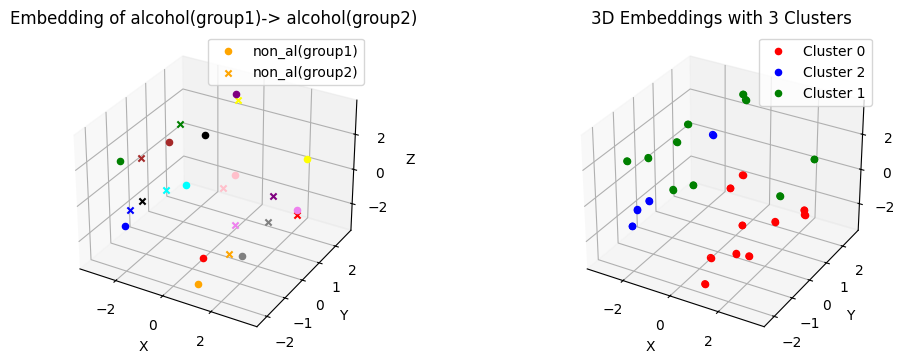

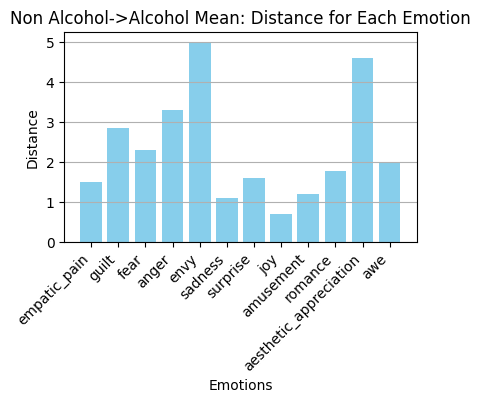

In [ ]:
# 次にgroup1, group2飲酒、飲酒
non_al_folder_path = "./qualia_rawdata/cluster_by_group/alcohol/group1/"
al_folder_path = "./qualia_rawdata/cluster_by_group/alcohol/group2/"
groups_al_distances = ea.process1(
    non_al_folder_path=non_al_folder_path,
    al_folder_path=al_folder_path,
    plot_dim=3,
    iter_num=100,
    title='Embedding of alcohol(group1)-> alcohol(group2)',
    labels=['al(group1)', 'al(group2)']
)

### ランダム化させたベンチマーク

In [ ]:
# 0 ~ 8 (4を除く) の間の整数でランダムな値を生成する関数
def generate_random_value():
    value = np.random.randint(0, 9)
    while value == 4:
        value = np.random.randint(0, 9)
    return value

def generate_random_matrix():
    # 12x12の行列を作成
    size = 12
    random_matrix = np.zeros((size, size), dtype=int)

    # 対角成分を8に設定
    np.fill_diagonal(random_matrix, 0)

    # 下三角行列のランダムな値を設定
    for i in range(size):
        for j in range(i):
            random_value = generate_random_value()
            random_matrix[i, j] = random_value
            random_matrix[j, i] = random_value  # 対称行列にするため
    return random_matrix


In [ ]:
def random_transfer(iter_num, plot_dim, title):

    #generate random dissimilarity matix
    random_matrices = [generate_random_matrix() for _ in range(2)]
    emotions = list(qualia_color.keys())
    cal_dissim = CalculateDissimilarity(emotions=emotions)
    random_embeddings = [cal_dissim.original_embedding(dissimilarity_matrix=matrix, plot_dim=3) for matrix in random_matrices]

    colors = list(qualia_color.values())
    gwot = GWOptimalTransfer(emotions=emotions)

    #totally same as the emotionanalysis class
    optimal_P, optimal_Q, mapped_random_embeddings = gwot.run_personal_gwot(
        X_dissimilarity_matrix=random_matrices[0],
        Y_dissimilarity_matrix=random_matrices[1],
        X_embedding=random_embeddings[0],
        Y_embedding=random_embeddings[1],
        iter_num=iter_num
    )
    print(f'mapped mean embeddings:{np.array(mapped_random_embeddings).shape}')

    markers = ['o', 'x']
    labels=['non_al(group1)', 'non_al(group2)']
    n_clusters = 3
    handles = []

    fig = plt.figure(figsize=(12,9))

    if plot_dim==2:
        ax = fig.add_subplot(2,2,1)
        for i in range(len(mapped_random_embeddings)):
            for j in range(len(mapped_random_embeddings[0])):
                scatter = ax.scatter(mapped_random_embeddings[i][j,0], mapped_random_embeddings[i][j,1], color=colors[j], marker=markers[i], label=labels[i])
                if j==0:
                    handles.append(scatter)

    elif plot_dim==3:
        ax = fig.add_subplot(2,2,1, projection='3d')
        for i in range(len(mapped_random_embeddings)):
            for j in range(len(mapped_random_embeddings[0])):
                scatter = ax.scatter(mapped_random_embeddings[i][j,0], mapped_random_embeddings[i][j,1], mapped_random_embeddings[i][j,2], color=colors[j], marker=markers[i], label=labels[i])
                if j==0:
                    handles.append(scatter)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    if plot_dim==3:
        ax.set_zlabel('Z')
    ax.set_title(f'{title}')
    ax.grid(True)

    # 凡例を追加
    ax.legend(handles, labels)

    # 各感情ごとにデータを収集
    emotion_embeddings = []
    for i in range(12):
        emotion_embeddings.append(np.vstack([mapped_random_embeddings[j][i] for j in range(len(mapped_random_embeddings))]))

    emotion_embeddings = np.array(emotion_embeddings)  # (12, 9, 2)の形状に変換

    # 各感情ごとにデータをフラット化
    flattened_embeddings = emotion_embeddings.reshape(12, -1)  # (12, 10)の形状に変換

    # k-meansクラスタリングの適用
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_embeddings)

    # クラスタのラベル取得
    emotion_labels = kmeans.labels_

    # クラスタごとの色設定
    cluster_colors = ['r', 'g', 'b', 'y', 'c']
    emotion_colors = [cluster_colors[label % len(cluster_colors)] for label in emotion_labels]
    handles = dict()
    #プロット
    if plot_dim ==2:
        ax = fig.add_subplot(2,2,2)
        handle_cluster_flags = np.zeros(n_clusters)
        # 各感情のデータポイントをクラスタごとにプロット
        for i, embedding in enumerate(emotion_embeddings):
            for j in range(len(mapped_random_embeddings)):
                scatter = ax.scatter(embedding[j, 0], embedding[j, 1],  color=emotion_colors[i], label=f'Cluster {emotion_labels[i]}' if j == 0 else "")
                if handle_cluster_flags[emotion_labels[i]] == 0:
                    handles[f'Cluster {emotion_labels[i]}'] = scatter
                    handle_cluster_flags[emotion_labels[i]] = 1
                ax.scatter(embedding[j, 0], embedding[j, 1], edgecolor=emotion_colors[i], facecolor='none')
    elif plot_dim==3:
        ax = fig.add_subplot(2,2,2, projection='3d')
        handle_cluster_flags = np.zeros(n_clusters)
        # 各感情のデータポイントをクラスタごとにプロット
        for i, embedding in enumerate(emotion_embeddings):
            for j in range(len(mapped_random_embeddings)):
                scatter = ax.scatter(embedding[j, 0], embedding[j, 1], embedding[j, 2],  color=emotion_colors[i])
                if handle_cluster_flags[emotion_labels[i]] == 0:
                    handles[f'Cluster {emotion_labels[i]}'] = scatter
                    handle_cluster_flags[emotion_labels[i]] = 1
                ax.scatter(embedding[j, 0], embedding[j, 1],  embedding[j, 2], edgecolor=emotion_colors[i], facecolor='none')


    # グラフの装飾
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    if plot_dim==3:
        ax.set_zlabel('Y')
    ax.set_title(f'{plot_dim}D Embeddings with {n_clusters} Clusters')
    ax.grid(True)
    ax.legend(list(handles.values()), list(handles.keys()))


    #感情が属しているクラス分類
    cluster_emotions = {cluster: [] for cluster in range(n_clusters)}
    for i, emotion in enumerate(emotions):
        cluster_emotions[emotion_labels[i]].append(emotion)
    print("\nCluster Emotions:")
    for cluster, emotions_ in cluster_emotions.items():
        print(f"Cluster {cluster}: {emotions_}")

    np.array(mapped_random_embeddings).shape
    #感情間の距離の表示
    embeddings_diff = mapped_random_embeddings[0] - mapped_random_embeddings[1]
    distances = [(diff[0]**2 + diff[1]**2)**0.5 for diff in embeddings_diff]
    # 棒グラフの作成
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(2,2,2)
    ax.bar(emotions, distances, color='skyblue')
    ax.set_xlabel('Emotions')
    ax.set_ylabel('Distance')
    ax.set_title(f'Non Alcohol->Alcohol Mean: Distance for Each Emotion')
    ax.set_xticks(range(len(emotions)))  # ティックの位置を設定
    ax.set_xticklabels(emotions, rotation=45, ha='right')
    ax.grid(axis='y')
    plt.show()
    random_distances = distances
    return random_distances

In [ ]:
random_distances = random_transfer(
    iter_num=10,
    plot_dim=3,
    title='Embedding of Random -> Random'
)

  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
  3%|▎         | 33/1000 [11:44<5:43:56, 21.34s/it]


KeyboardInterrupt: 

In [ ]:
# バーの幅と位置の設定
emotions = list(qualia_color.keys())
bar_width = 0.3
index = np.arange(len(emotions))

# グラフの作成
fig, ax = plt.subplots(figsize=(10, 6))

# 棒グラフの描画
bar0 = ax.bar(index, groups_nonal_distances, bar_width, label='Nonalcohol->Nonalcohol', color='pink')
bar1 = ax.bar(index + bar_width, groups_al_distances, bar_width, label='Alcohol->Alcohol', color='skyblue')
bar2 = ax.bar(index + 2*bar_width, random_distances, bar_width, label='Random benchmark', color='orange')

# ラベルとタイトルの設定
ax.set_xlabel('Emotions')
ax.set_ylabel('Distance')
ax.set_title(' Mean Distance between subject groups for Each Emotion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(emotions, rotation=45, ha='right')
ax.legend()

# グリッドの追加
ax.grid(axis='y')

# グラフの表示
plt.tight_layout()
plt.show()